In [13]:
import pixellib
from pixellib.tune_bg import alter_bg
%load_ext cython

#change_bg = alter_bg()

#change_bg.load_pascalvoc_model("deeplabv3_xception_tf_dim_ordering_tf_kernels.h5")
#change_bg.change_bg_img(f_image_path = "monster.jpg",b_image_path = "background.jpg", output_image_name="new_img.jpg")


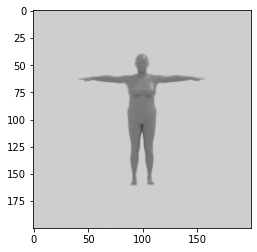

In [14]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('humans/dataset/synthetic_images/200x200/pose0/female/subject_mesh_0003.png')  


# grab the image dimensions
h = img.shape[0]
w = img.shape[1]

           
           
#img = cv2.imread('monster.jpg')  
plt.imshow(img)


In [21]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

######################################################################################
# OPTIONS
######################################################################################

# add texture background to the images or add random RGB values
texture = True

# human and monster data have different filenames, why...
humans = False # else monsters
######################################################################################

######################################################################################

if humans:
    # folders with our humanoid data
    dataset = [
        ("humans/dataset/synthetic_images/200x200/pose0/female/", "dtd/labels/combined1.txt"),
        ("humans/dataset/synthetic_images/200x200/pose0/male/","dtd/labels/combined2.txt"),
        ("humans/dataset/synthetic_images/200x200/pose1/female/", "dtd/labels/combined3.txt"),
        ("humans/dataset/synthetic_images/200x200/pose1/male/", "dtd/labels/combined4.txt"),
    ]
else:
    # folders with our humanoid data
    dataset = [
        ("monsters/dataset/synthetic_images/200x200/pose0/female/", "dtd/labels/combined5.txt"),
        ("monsters/dataset/synthetic_images/200x200/pose0/male/","dtd/labels/combined6.txt"),
        ("monsters/dataset/synthetic_images/200x200/pose1/female/", "dtd/labels/combined7.txt"),
        ("monsters/dataset/synthetic_images/200x200/pose1/male/", "dtd/labels/combined8.txt")
    ]

       
# get through all the humanoid images
for humanoid, backgrounds in dataset:
    
    # string for the reading and writing of the filenames    
    # first filename starts with 001
    if humans:
        counter = "0001"
    else:
        counter = "001"
    
    i = 1
    # read in the paths to the background files - contains different folders, etc -> for convenience
    with open(backgrounds) as f:
        lines = f.readlines()

    # get through all the background images
    for line in lines:
        

        # get the monster images
        img = None
        img = cv2.imread(humanoid + "subject_mesh_" + counter + ".png")  
        
        if (img is None):
            print("%d images created" % (i-1))
            break
        # each line contains the filename of a background plus newline, strip that newline and then read in the image
        back = cv2.imread("dtd/images/" + str(line).rstrip())  

        # last image reached
        if back is None:
            break

        # grab the image dimensions
        h = img.shape[0]
        w = img.shape[1]

        # channels are b,g,r -> 0,1,2
        channel = 2 # red  
        
        # we want no texture but random rgb values for the background - see statement line 1
        if not texture:
            rand_b = np.random.randint(255)
            rand_g = np.random.randint(255)
            rand_r = np.random.randint(255)

        # loop over the image, pixel by pixel
        for y in range(0, h):
            for x in range(0, w):

                # in the luma range from 200 to 130 we have the border of the body, 
                # this border gets cut away a bit, therefore take the grey level of the body and colour
                # the border with the body color
                if img[x,y, channel] < 200 and img[x,y, channel] > 130:
                    img[x,y] = 120

                # the background hast luma 200
                # so replace everything with that value from another image
                if img[x,y, channel] >= 200:
                    if texture:
                        img[x,y] = back[x,y]
                    else:
                        img[x,y] = (rand_b, rand_g, rand_r);

        # write the new image into the same folder
        if texture:
            # texture background
            cv2.imwrite(humanoid + "/subject_mesh_w_texture_" + counter + ".png", img)
        else:
            # random rgb background
            cv2.imwrite(humanoid + "/subject_mesh_w_rgb_" + counter + ".png", img)
            

        i = i + 1

        if humans:
            # convert our iteration counter to a string in order to use it for the filenames
            if i <= 9:
                counter = "000" + str(i)
            elif i <= 99:
                counter = "00" + str(int(i / 10)) + str(i % 10)
            elif i <= 999:
                counter = "0" + str(int(i / 100)) + str(int(i / 10 % 10)) + str(i % 10)
            elif i <= 9999:
                counter = str(int(i / 100)) + str(int(i / 10 % 10)) + str(i % 10)
        else:
            # convert our iteration counter to a string in order to use it for the filenames
            if i <= 9:
                counter = "00" + str(i)
            elif i <= 99:
                counter = "0" + str(int(i / 10)) + str(i % 10)
            elif i <= 999:
                counter = str(int(i / 100)) + str(int(i / 10 % 10)) + str(i % 10)
            
    print("dataset completed")
print("finished")

500 images created
dataset completed
500 images created
dataset completed
500 images created
dataset completed
500 images created
dataset completed
finished
